In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                        
import warnings
#warnings.filterwarnings(action='once')

# Chargement du dataset et analyses préliminaires

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


Relevant Papers:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link]

In [92]:
data = pd.read_csv('online_shoppers_intention.csv')

Vérification de la taille du jeu de données :

In [93]:
data.shape

(12330, 18)

On a bien 12330 observations et 18 variables.

Regardons les dernières données :

In [94]:
data.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Regardons de plus près la répartition des données :

In [95]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Certaines données paraissent très grandes, il faudra voir s'il n'y a pas des outliers.

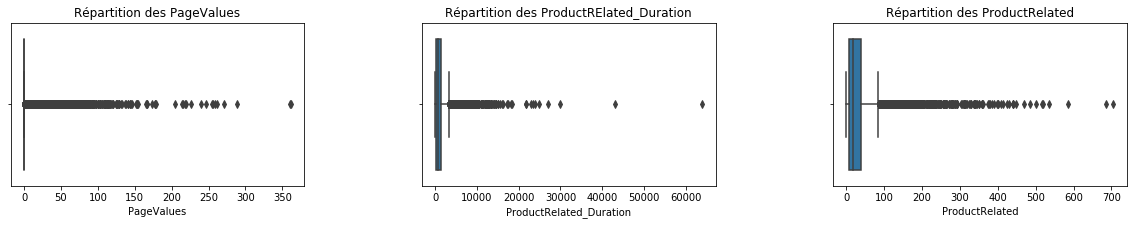

In [176]:
fig = plt.figure(figsize = (20,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
_ = sns.boxplot(data["PageValues"]).set_title('Répartition des PageValues')

ax = fig.add_subplot(1, 3, 2)
_ = sns.boxplot(data["ProductRelated_Duration"]).set_title('Répartition des ProductRElated_Duration')

ax = fig.add_subplot(1, 3, 3)
_ = sns.boxplot(data["ProductRelated"]).set_title('Répartition des ProductRelated')

On observe bien la présence d'outliers mais rien n'indique qu'il s'agit d'erreur. Nous préfrons donc les garder dans l'étude.

Regardons désormais s'il y a des données manquantes :

In [99]:
data.isnull().values.any()

False

Il n'y a pas de données manquantes.

Vérifions le type des variables :

In [100]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Il faut changer le type des variables "Month" et "VisitorType" :

In [101]:
months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
data['Month'] = data['Month'].map(months)
data[['Month', 'VisitorType']].tail(10)

,Month,VisitorType
12320,11,Returning_Visitor
12321,11,Returning_Visitor
12322,12,Returning_Visitor
12323,11,Returning_Visitor
12324,11,Returning_Visitor
12325,12,Returning_Visitor
12326,11,Returning_Visitor
12327,11,Returning_Visitor
12328,11,Returning_Visitor
12329,11,New_Visitor


In [102]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Calculons la matrice de corrélation entre les variables :

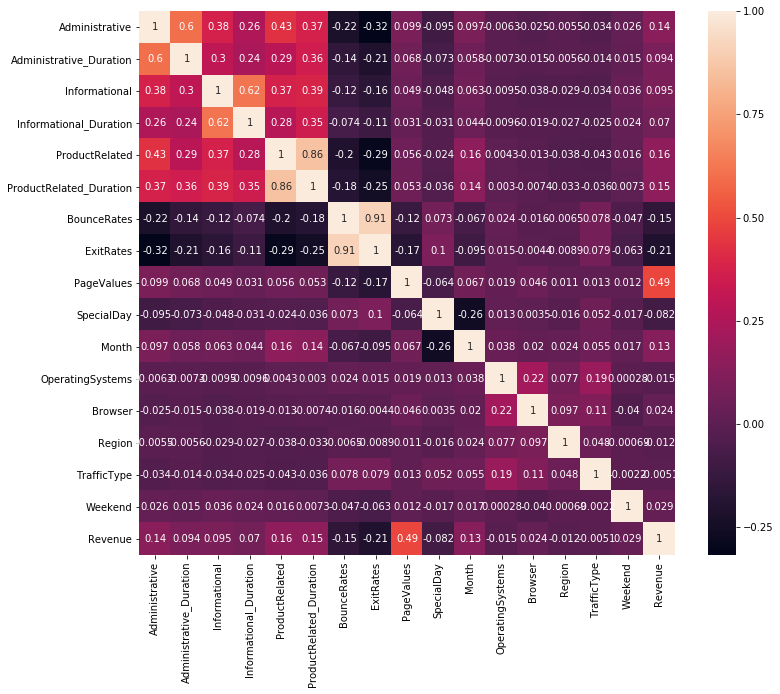

In [179]:
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
_ = sns.heatmap(correlationMatrix, xticklabels = correlationMatrix.columns, yticklabels = correlationMatrix.columns, annot = True)

ExitRates et BounceRates sont très fortement corrélées (0.91).
Nous allons retirer cette colonne du jeu de données pour éviter les problèmes de multi colinéarité :

In [18]:
data = data.drop(labels = "ExitRates", axis = 1)
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend',
       'Revenue'],
      dtype='object')

On remarque également des corrélations entre Administrative et Administrative_Duration, Informational et Informational_Duration, ProductRelated et ProductRelated_Duration. Ces corrélations sont normales puisque ces couples de variables portent sur la même information : le nombre de pages de ce type et la durée sur les pages de ce type. 

On remarque par ailleurs une corrélation de 0.49 entre la PageValues et le Revenue.

Regardons maintenant la répartition de la variable à prédire, 'Revenue' :

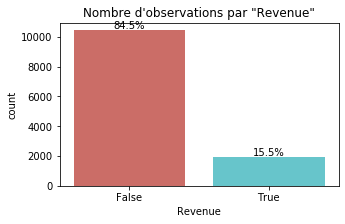

In [183]:
fig = plt.figure(figsize = (5,3))
ax = sns.countplot(data['Revenue'], palette = 'hls')
ax.set_title('Nombre d\'observations par "Revenue"')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

Il y a un mauvais équilibre entre les observations pour lesquelles nous observons un 'Revenue' (15.5%) et celles pour lesquelles ce n'est pas le cas (84.5%). Lorsque nous évaluerons des modèles, l'accuracy ne sera pas un bon indicateur. En effet, il suffira de prédire toujours False pour avoir une accuracy à 84.5%. Nous allons donc plutôt regarder le score F1 qui, étant fonction de la précision et du recall, représente un bon équilibre entre les 2. 

# EDA - Analyse exploratoire

## Analyse des visites et des revenus

### Par mois

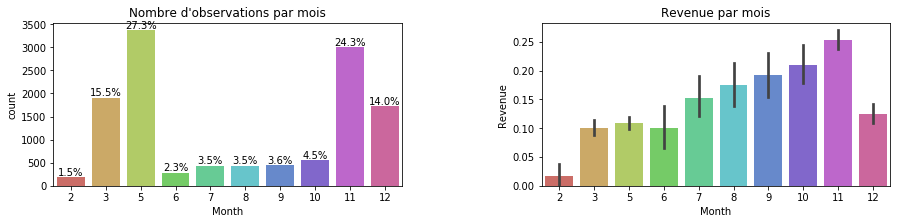

In [186]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['Month'], palette = 'hls')
ax.set_title('Nombre d\'observations par mois')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="Month", y="Revenue", data=data, palette = 'hls').set_title('Revenue par mois')  

Les données ne sont pas équilibrées sur l'année, il y a plus de visites aux mois de Mai, Novembre, Mars et Décembre. 
On remarque également qu'il nous manque les données pour Janvier et Avril.

Malgré ce déséquilibre, nous observons une tendance des revenus à la hausse entre mars et novembre.

### Par jours de la semaine

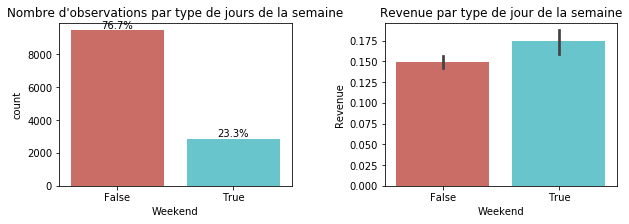

In [185]:
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['Weekend'], palette = 'hls')
ax.set_title('Nombre d\'observations par type de jours de la semaine')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="Weekend", y="Revenue", data=data, palette = 'hls').set_title('Revenue par type de jour de la semaine')

Les données représentent majoritairement des visites en semaine (76.7%) mais les revenus sont plus importants les week-ends.

### Par Special Days

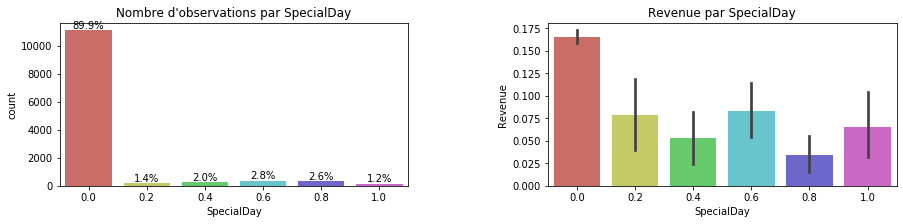

In [188]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['SpecialDay'], palette = 'hls')
ax.set_title('Nombre d\'observations par SpecialDay')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="SpecialDay", y="Revenue", data=data, palette = 'hls').set_title('Revenue par SpecialDay')

Le jeu de donnée contient majoritairement des visites qui ne sont pas dans les 15 jours précédant une fête, ce qui parait logique. 

En moyenne sur l'année, les 15 jours précédant une fête génèrent plus de revenus.

Regardons ce qui se passe au niveau du mois :

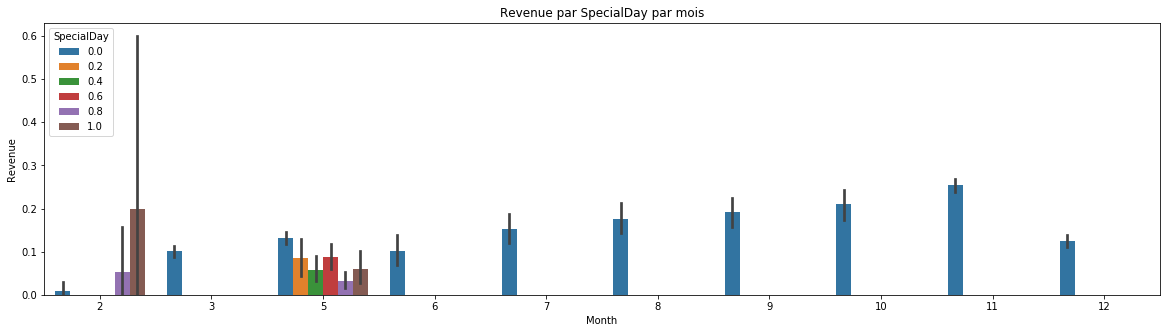

In [118]:
plt.figure(figsize=(20,5))
_ = sns.barplot(x="Month", y="Revenue", hue = "SpecialDay", data=data).set_title('Revenue par SpecialDay par mois')

Seuls les mois de février (Saint Valentin) et de mai (fêtes des mères et des pères) sont concernés par les Special Days. On observe que la majorité des revenus pour ces mois-ci sont réalisés dans les 15 jours qui précédent la fête.

### Par type de visiteurs

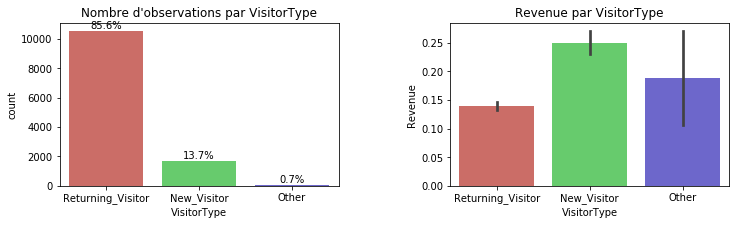

In [190]:
fig = plt.figure(figsize = (12,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['VisitorType'], palette = 'hls')
ax.set_title('Nombre d\'observations par VisitorType')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="VisitorType", y="Revenue", data=data, palette = "hls").set_title('Revenue par VisitorType')

La plupart des observations concerne des visiteurs qui sont déjà venus sur le site (85.6% des observations).

Dans ce jeu de données, il n'y a que 15,5% des observations qui génèrent du revenu.
Les revenus sont plus élevés en semaine que pendant le week-end (seulement 23,3 % le week-end). 
Ce jeu de données est composé essentiellement de visiteurs qui étaient déjà venus sur le site (85.6% des visiteurs). Cependant, Ce sont les les nouveaux visiteurs qui génèrent le plus de revenus.

### Par régions

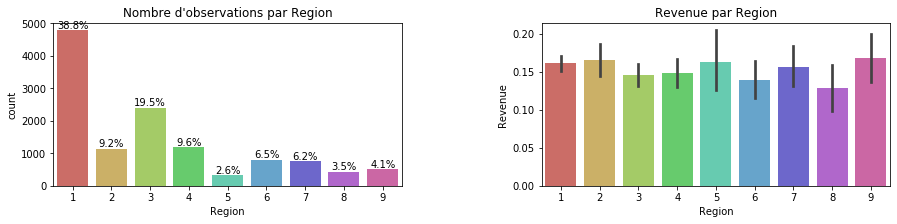

In [192]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['Region'], palette = 'hls')
ax.set_title('Nombre d\'observations par Region')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="Region", y="Revenue", data=data, palette = 'hls').set_title('Revenue par Region')

La région 1 est la plus représentée, suivie de la 3.

Les régions 1, 2, 5 et 9 génèrent le plus de revenus.

### Par type de traffic

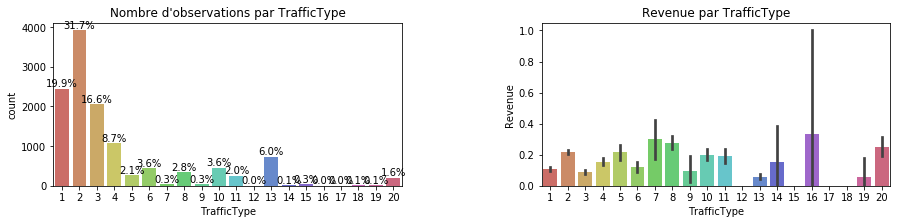

In [196]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1, 2, 1)
ax = sns.countplot(data['TrafficType'], palette = 'hls')
ax.set_title('Nombre d\'observations par TrafficType')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

fig.add_subplot(1, 2, 2)
_ = sns.barplot(x="TrafficType", y="Revenue", data=data, palette = 'hls').set_title('Revenue par TrafficType')

Le jeu de données présente majoritairement des visites avec un TrafficType de 1 à 4. Cependant, on peut constater que ce ne sont pas ceux qui sont les mieux qualifiés. En effet, la part des visiteurs avec un TrafficType de 7 ou 20 et qui génère des Revenues est bien plus élevée que cette part pour les visiteurs avec un Traffic de 1 à 4.

### Par type de Brower et d'OS 

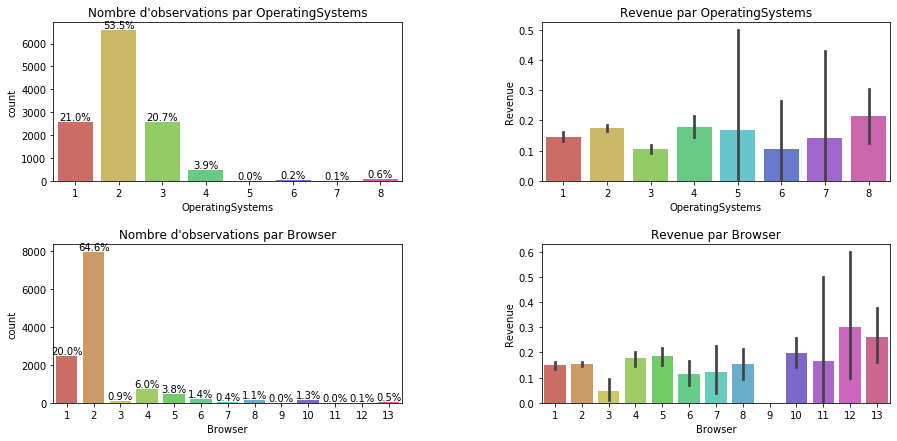

In [203]:
fig = plt.figure(figsize = (15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(2, 2, 1)
ax = sns.countplot(data['OperatingSystems'], palette = 'hls')
ax.set_title('Nombre d\'observations par OperatingSystems')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
fig.add_subplot(2, 2, 2)
_ = sns.barplot(x="OperatingSystems", y="Revenue", data=data, palette = 'hls').set_title('Revenue par OperatingSystems')

fig.add_subplot(2, 2, 3)
ax = sns.countplot(data['Browser'], palette = 'hls')
ax.set_title('Nombre d\'observations par Browser')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
fig.add_subplot(2, 2, 4)
_ = sns.barplot(x="Browser", y="Revenue", data=data, palette = 'hls').set_title('Revenue par Browser')

On constate ici également que les Systèmes d'Opérations et les Browsers qui représentent le plus de visites ne sont pas ceux qui transforment le plus.

### Par Page Values et Bounce Rates

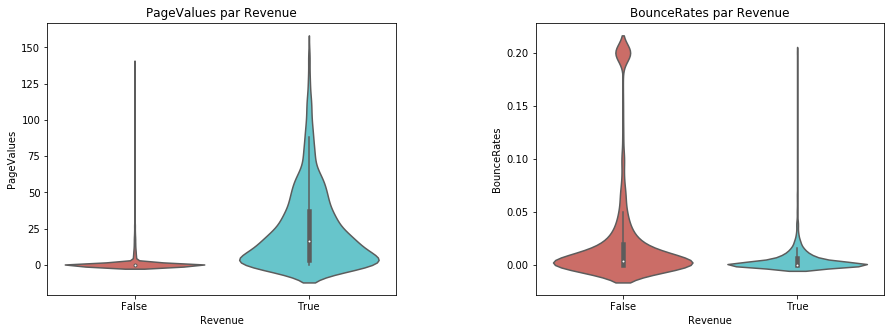

In [199]:
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
_ = sns.violinplot(x="Revenue", y="PageValues", data=data[data["PageValues"] < 150], scale="width", palette = 'hls').set_title('PageValues par Revenue')

ax = fig.add_subplot(1, 2, 2)
_ = sns.violinplot(x="Revenue", y="BounceRates", data=data, scale="width", palette = 'hls').set_title('BounceRates par Revenue')

Les observations pour lesquelles des PageValue > 0 ont été visitées ont généré plus de "Revenue".

Le taux de rebond semble moins élevé pour les observations ayant généré du "Revenue".

### Par type de pages visitées

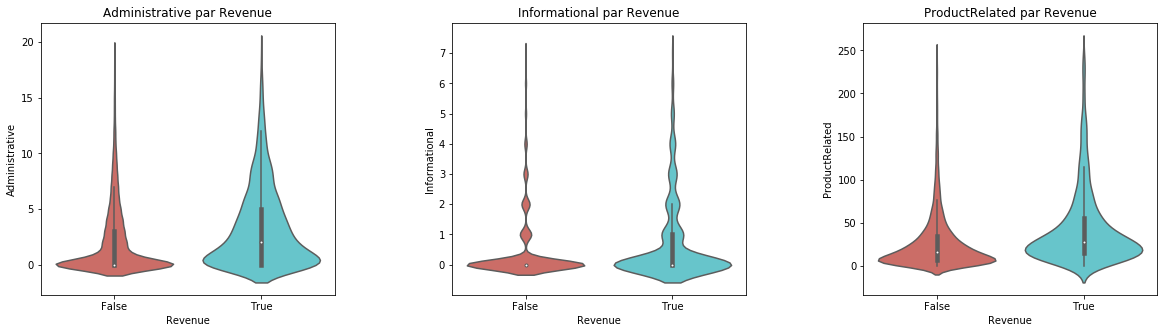

In [173]:
fig = plt.figure(figsize = (20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
_ = sns.violinplot(x="Revenue", y="Administrative", data=data[data["Administrative"]<20], scale="width", palette = 'hls').set_title('Administrative par Revenue')

ax = fig.add_subplot(1, 3, 2)
_ = sns.violinplot(x="Revenue", y="Informational", data=data[data["Informational"]<8], scale="width", palette = 'hls').set_title('Informational par Revenue')

ax = fig.add_subplot(1, 3, 3)
_ = sns.violinplot(x="Revenue", y="ProductRelated", data=data[data["ProductRelated"]<250], scale="width", palette = 'hls').set_title('ProductRelated par Revenue')

On remarque que plus d'observations ont généré du "Revenue" après avoir visité des pages "Administrative".

## Clustering analysis

Nous commençons par préparer le jeu de données pour l'analyse :
* séparation en un jeu de données contenant les variables, x, et un jeu de données contenant la variable à prédire, y
* réencodage des variables qualitatives en nouvelles variables booléenes en utilisant la fonction ScikitLearn OneHotEncoder(). 
* application de la fonction StandardScaler() de ScikitLearn sur les données numériques afin de normaliser ces données

In [45]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

columns_to_encode = ['VisitorType', "TrafficType", "Month", "Weekend", "SpecialDay", "Region", "Browser", "OperatingSystems"]
columns_to_scale  = ["Administrative","Administrative_Duration","Informational","Informational_Duration",
        "ProductRelated","ProductRelated_Duration","BounceRates","PageValues"]

scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

scaled_columns  = scaler.fit_transform(x[columns_to_scale]) 
encoded_columns = ohe.fit_transform(x[columns_to_encode])

columns_encoded = ohe.get_feature_names(['VisitorType', "TrafficType", "Month", "Weekend", "SpecialDay", "Region", "Browser", "OperatingSystems"])
columns_scaled = np.array(columns_to_scale)
columns = np.concatenate([columns_scaled, columns_encoded])

# Concatenate (Column-Bind) Processed Columns Back Together
data_scaled = np.concatenate([scaled_columns, encoded_columns], axis=1)
data_scaled

data_scaled_df = pd.DataFrame(data_scaled, columns = columns)

Nous réalisons ensuite une analyse en composantes principales (PCA) sur les données normalisées.

In [142]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca = pca.fit_transform(data_scaled)

Voici la part de la variance expliquée par chaque composante :

In [143]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.55354274e-01, 9.34326240e-02, 8.48533487e-02, 7.85636339e-02,
       6.91209748e-02, 4.29082715e-02, 3.42900272e-02, 3.00946724e-02,
       2.85429550e-02, 2.63359908e-02, 2.36759646e-02, 2.30708588e-02,
       2.15364699e-02, 1.62891643e-02, 1.50204439e-02, 1.28050418e-02,
       1.19412450e-02, 1.14281388e-02, 9.82789094e-03, 9.25873965e-03,
       8.13268032e-03, 7.55655556e-03, 6.12390722e-03, 6.09128697e-03,
       5.21266389e-03, 5.17020930e-03, 4.88113231e-03, 4.38918324e-03,
       3.91899995e-03, 3.67569003e-03, 3.51568757e-03, 3.28250291e-03,
       3.04270736e-03, 2.87550522e-03, 2.81798965e-03, 2.74175578e-03,
       2.40204022e-03, 2.20529972e-03, 2.19381875e-03, 2.14122748e-03,
       1.98297503e-03, 1.90765593e-03, 1.77662851e-03, 1.65225122e-03,
       1.61488789e-03, 1.44825149e-03, 1.29298779e-03, 1.20812084e-03,
       1.09061667e-03, 9.91776040e-04, 7.50232149e-04, 7.38420200e-04,
       6.01336311e-04, 3.48126562e-04, 3.24760367e-04, 2.63715122e-04,
      

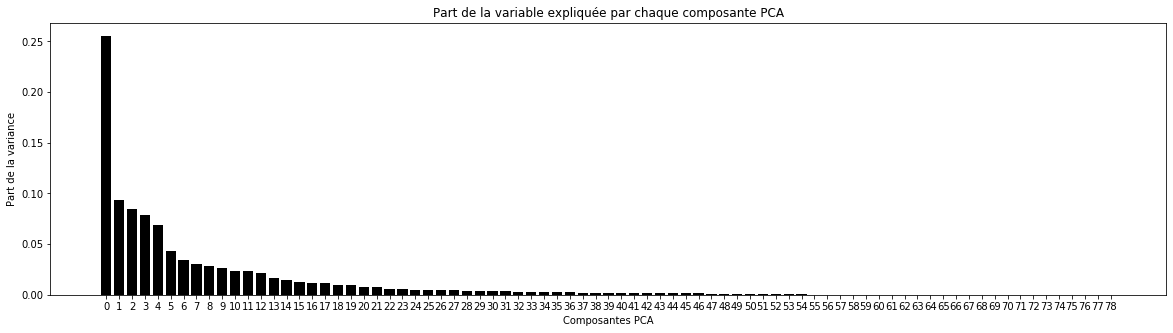

In [144]:
features = range(pca.n_components_)

_ = plt.figure(figsize = (20,5))
_ = plt.bar(features, pca.explained_variance_ratio_, color='black')
_ = plt.xlabel('Composantes PCA')
_ = plt.ylabel('Part de la variance')
_ = plt.xticks(features)
_ = plt.title('Part de la variable expliquée par chaque composante PCA')

Selon la règle du coude, nous ne devrions garder que la première composante. Cependant, celle-ci ne couvre que 25% de la variance.

Nous allons regarder les 3 premières composantes seulement, mais il faudrait garder les 12 premières composantes.

In [49]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, data], axis = 1)

Regardons les directions des variables dans le plan des deux premières composantes :

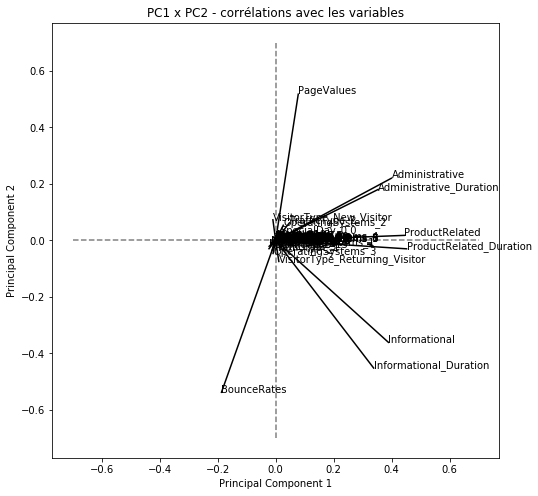

In [165]:
pcs = pca.components_

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PC1 x PC2 - corrélations avec les variables', fontsize = 12)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_scaled_df.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
_ = plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
_ = plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')



L'axe des abscisses en positif se corrèle fortement positivement avec les variables ProductRelated et ProductRelated_Duration, et est également corrélée positivement aux variables Administrative, Administrative_Duration, Informational, Informational_Duration.

L'axe des ordonnées est corrélé positivement avec la variable PageValues et corrélé négativement avec le BounceRates.

On s'attend donc à observer des observations à Revenue en haut et à droite du plan, et des observations sans Revenue au milieu et en bas.
Vérifions cela :

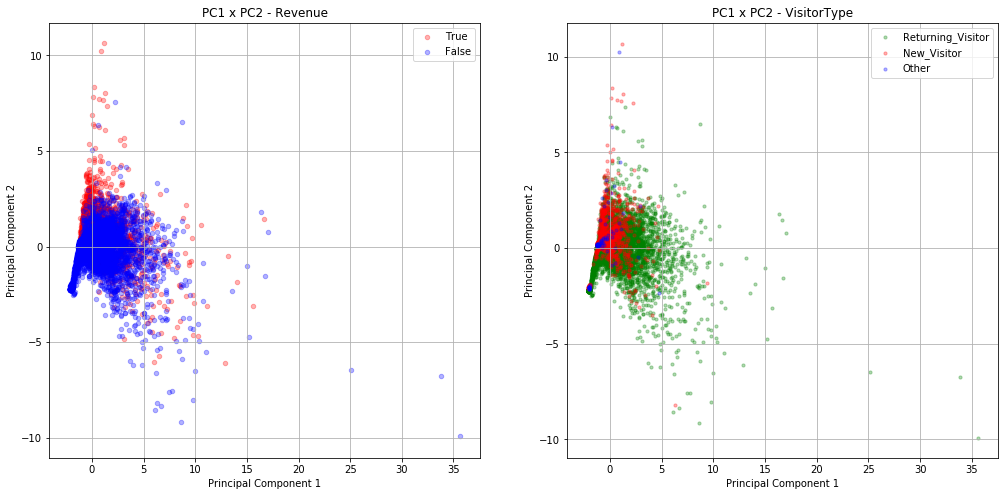

In [204]:
fig = plt.figure(figsize = (17,8))
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PC1 x PC2 - Revenue', fontsize = 12)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Revenue'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c = color, s = 20, alpha=0.3)
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PC1 x PC2 - VisitorType', fontsize = 12)
targets = ["Returning_Visitor", "New_Visitor", "Other"]
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['VisitorType'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'], 
               c = color, s = 10, alpha=0.3)
ax.legend(targets)
ax.grid()

On remarque effectivement plus d'observations à Revenue en faut du graphique.

Les Returning_Visitor ont plus tendance à visiter les pages informationnelles, ProductRelated ou administratives, alors que les New_Visitor ont tendance à plus visiter des pages à forte PageValues.

Regardons les directions des variables dans le plan des composantes 1 et 3 :

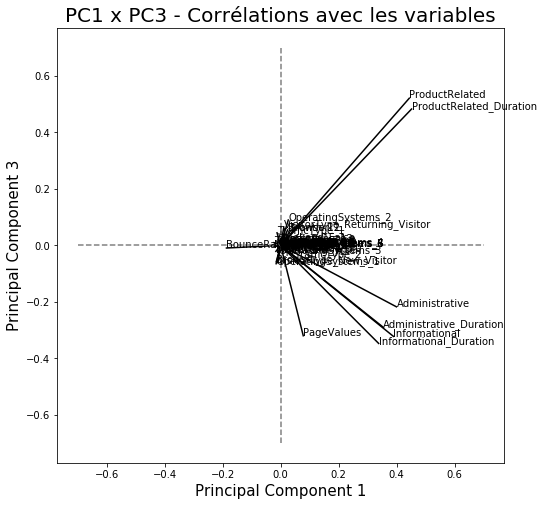

In [162]:
pcs = pca.components_

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PC1 x PC3 - Corrélations avec les variables', fontsize = 20)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_scaled_df.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
_ = plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
_ = plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')


Le plan des composantes principales 1 et 3 n'apport pas beaucoup plus d'informations que le plan des composantes 1 et 2. En effet ce sont les mêmes variables qui sont corrélées, à l'exception du BounceRates qui n'apparait plus.
Les graphiques représentant les Revenue et les VisitorType sur ce plan n'apport donc pas plus d'informations que les précédents.

Il en est par ailleurs de même avec le plan des composantes 2 et 3.

Déterminons maintenant un nombre de clusters avec un KMeans à partir de ces composantes :

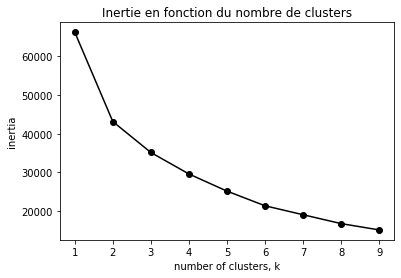

In [147]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(principalDf.iloc[:,:3])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Inertie en fonction du nombre de clusters')
plt.show()

Selon la technique du coude, on peut déduire du graphique qu'il y a 2 clusters.

Regardons la répartition de ces clusters sur le plan représenté par les 2 premières composantes de l'ACP :

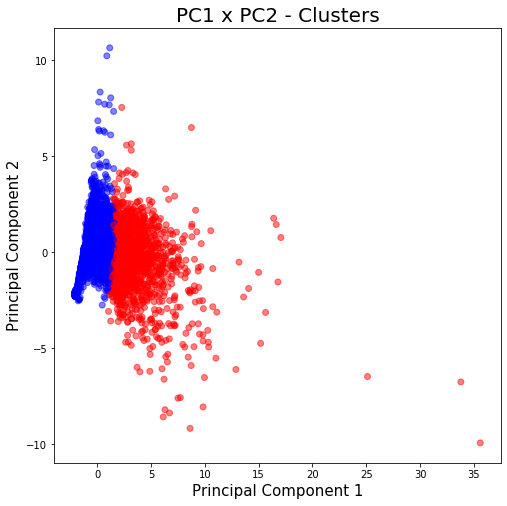

In [148]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(principalComponents)

LABEL_COLOR_MAP = {0:'r', 1: 'b', 2: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PC1 x PC2 - Clusters', fontsize = 20)
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()

Les clusters semblent correspondre à la répartition New_Visitor et Returning_Visitor.

# Modélisation

## Préparation des jeux de données d'entrainement et de test

In [63]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedKFold

# Création de la seed
seed = 42

# Création des variables x et y
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split en 1 jeu d'entrainement et un jeu de test
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(x, y,
                                    test_size=0.3, # 30% des données dans le jeu de test
                                    random_state = seed, # fixe le split pour la reproductabilité
                                    stratify = y # assure une répartiion égale de y True et False dans les 2 jeux générés
                                    )

# Création de la variable de Kfold stratifié
skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)


# Encodage et standardisation des variables
columns_to_encode = ['VisitorType', "TrafficType", "Month", "Weekend", "SpecialDay", "Region", "Browser", "OperatingSystems"]
others_columns  = ["Administrative","Administrative_Duration","Informational","Informational_Duration",
                    "ProductRelated","ProductRelated_Duration","BounceRates","PageValues"]

ohe = OneHotEncoder(sparse=False).fit(X_train[columns_to_encode])
X_train_ohe = ohe.transform(X_train[columns_to_encode])
X_test_ohe = ohe.transform(X_test[columns_to_encode])

columns_encoded = ohe.get_feature_names(['VisitorType', "TrafficType", "Month", "Weekend", "SpecialDay", "Region", "Browser", "OperatingSystems"])
columns_scaled = np.array(others_columns)
columns = np.concatenate([columns_scaled, columns_encoded])

X_train2 = np.concatenate([np.array(X_train[others_columns]), X_train_ohe], axis=1)
X_test2 = np.concatenate([np.array(X_test[others_columns]), X_test_ohe], axis=1)

std_scale  = StandardScaler().fit(X_train2) 
X_train_std = std_scale.transform(X_train2)
X_test_std = std_scale.transform(X_test2)

X_train_std_df = pd.DataFrame(X_train_std, columns = columns)
X_test_std_df = pd.DataFrame(X_test_std, columns = columns)

In [64]:
others_columns  = ["Administrative","Administrative_Duration","Informational","Informational_Duration",
                    "ProductRelated","ProductRelated_Duration","BounceRates","PageValues"]
np.array(X_train[others_columns])

array([[4.00000000e+00, 4.54000000e+01, 0.00000000e+00, ...,
        3.39000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.02500000e+01, 0.00000000e+00, ...,
        5.01766667e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.44166667e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.00000000e+00, 1.66666667e+01, 0.00000000e+00, ...,
        2.59374167e+03, 2.94117600e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.33133333e+02, 2.35294120e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.78480000e+03, 2.73972600e-03, 6.13598245e+00]])

On a créé une variable x qui contient toutes les colonnes du jeu de données sauf la variable à prédire "Revenue" et une variable y qui correspond à la variable à prédire "Revenue".

Le jeu de données a été séparé en deux : un jeu d'entraintement X_train qui contient 70% des données et un jeu de test X_test qui contient 30% des données. 
Cette séparation en deux jeux de données a été réalisée de façon stratifiée. En effet, comme nous avons un déséquilibre dans les données avec beaucoup plus de "Revenue" à False qu'à True, la stratification permet de s'assurer que cette proportion de True/False est équivalente dans les deux jeux de données générés.
Par ailleurs, nous avons déposé une seed, afin de pouvoir reproduire les résultats (c'est-à-dire qu'à chaque éxécution du code, les deux mêmes jeux de données sont générés).
Dans le même esprit, nous avons créé une variable pour fixer des folds stratifiés pour la validation croisée. Nous avons choisi d'utiliser 5 folds.

Nous avons ensuite standardisé les variables numériques : "Administrative","Administrative_Duration","Informational","Informational_Duration", "ProductRelated","ProductRelated_Duration","BounceRates","PageValues"
et encodé les variables catégorielles : 'VisitorType', "TrafficType", "Month", "Weekend", "SpecialDay", "Region", "Browser", "OperatingSystems"
Ces transformations ont été calculées sur le jeu d'entrainement X_train puis appliqué aux deux jeux X_train et X_test.


## Création d'une baseline de performances avec KNN

Nous allons tout d'abord trouver le k optimal pour une classification K-NN et identifier le score correspondant. Cela nous donnera un point de comparaison pour les autres classifications que nous allons faire après.

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 3} avec un score f1 de 0.292

Affichage de l'erreur en fonction du choix de K :


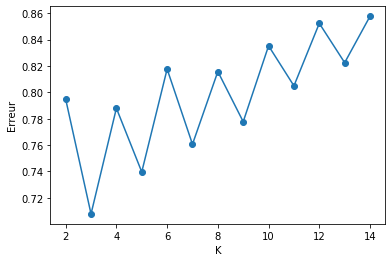

Résultats de la validation croisée :
	f1 = 0.205 (+/-0.013) for {'n_neighbors': 2}
	f1 = 0.292 (+/-0.025) for {'n_neighbors': 3}
	f1 = 0.212 (+/-0.060) for {'n_neighbors': 4}
	f1 = 0.260 (+/-0.020) for {'n_neighbors': 5}
	f1 = 0.182 (+/-0.034) for {'n_neighbors': 6}
	f1 = 0.239 (+/-0.039) for {'n_neighbors': 7}
	f1 = 0.184 (+/-0.017) for {'n_neighbors': 8}
	f1 = 0.222 (+/-0.032) for {'n_neighbors': 9}
	f1 = 0.165 (+/-0.028) for {'n_neighbors': 10}
	f1 = 0.195 (+/-0.028) for {'n_neighbors': 11}
	f1 = 0.148 (+/-0.019) for {'n_neighbors': 12}
	f1 = 0.177 (+/-0.020) for {'n_neighbors': 13}
	f1 = 0.142 (+/-0.037) for {'n_neighbors': 14}
CPU times: user 2min 51s, sys: 62.5 ms, total: 2min 51s
Wall time: 2min 55s


In [65]:
%%time
from sklearn import neighbors

# Fixer les valeurs des hyperparamètres à tester
params = {'n_neighbors': np.arange(2,15)}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'f1'

# Création du classifieur KNN
knn = neighbors.KNeighborsClassifier()

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
gs_knn = GridSearchCV(knn, # un classifieur kNN
                        params, # hyperparamètres à tester
                        cv = skf, # nombre de folds de validation croisée, on utilise les folds créés précédemment
                        scoring=score # score à optimiser
                        )

# Optimiser ce classifieur sur le jeu d'entraînement
gs_knn.fit(X_train_std, y_train)

# Dessigner l'évolution de l'erreur en fonction du choix de K
print("\nAffichage de l'erreur en fonction du choix de K :")
plt.plot(range(2,15), 1 - gs_knn.cv_results_['mean_test_score'], 'o-')
plt.ylabel('Erreur')
plt.xlabel('K')
plt.show()

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(gs_knn.cv_results_['mean_test_score'], # score moyen
    gs_knn.cv_results_['std_test_score'], # écart-type du score
    gs_knn.cv_results_['params'] # valeur de l'hyperparamètre
    ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
    mean, # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",gs_knn.best_params_, 
      "avec un score f1 de", round(gs_knn.cv_results_['mean_test_score'].max(), 3))

Nous allons maintenant prédire sur le jeu X_test pour comparer avec les vrais résultats :

In [66]:
from sklearn import metrics

y_pred = gs_knn.predict(X_test_std_df)
knn_pred_score = metrics.f1_score(y_test, y_pred)
print("\nSur le jeu de test le score f1 est de %0.3f" % knn_pred_score)


Sur le jeu de test le score f1 est de 0.283


Calculons et affichons la matrice de confusion :

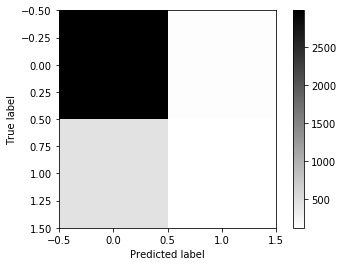

In [67]:
# Calcul de la matrice de confusion
cm_knn = metrics.confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.binary)
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label',
       xlabel='Predicted label')

plt.show()

On remarque de très nombreuses prédictions justes concernant l'absence de Revenue. En revanche, on prédit plus souvent un Revenue à False qu'à True lorsqu'il est en réalité True.

## Régression Logistique

In [68]:
%%time
from sklearn.linear_model import LogisticRegression

classifier_LogR = LogisticRegression(random_state = seed, solver='liblinear')

# On crée la grille de paramètres à tester
params = { 'penalty': ['l1','l2'], 
          'C': [0.001,0.01,0.1,1,10,100,1000]
         }

# On définit le type de score qu'on cherche à optimiser
score = 'f1'

# On crée la validation croisée avec GridSearchCV
gs_logr = GridSearchCV(classifier_LogR, 
                      params, 
                      scoring = score, 
                      cv = skf)

# On lance la validation croisée sur le jeu d'entrainement
gs_logr.fit(X_train_std, y_train)

# On affiche les hyperparamètres optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",gs_logr.best_params_, "avec un score f1 de", round(gs_logr.cv_results_['mean_test_score'].max(), 3))

# Afficher les différentes performances
print("\nRésultats de la validation croisée :")
for mean, std, params in zip(gs_logr.cv_results_['mean_test_score'], gs_logr.cv_results_['std_test_score'], gs_logr.cv_results_['params'] ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
    mean, # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'C': 10, 'penalty': 'l1'} avec un score f1 de 0.517

Résultats de la validation croisée :
	f1 = 0.065 (+/-0.012) for {'C': 0.001, 'penalty': 'l1'}
	f1 = 0.461 (+/-0.040) for {'C': 0.001, 'penalty': 'l2'}
	f1 = 0.481 (+/-0.038) for {'C': 0.01, 'penalty': 'l1'}
	f1 = 0.495 (+/-0.039) for {'C': 0.01, 'penalty': 'l2'}
	f1 = 0.509 (+/-0.033) for {'C': 0.1, 'penalty': 'l1'}
	f1 = 0.510 (+/-0.039) for {'C': 0.1, 'penalty': 'l2'}
	f1 = 0.515 (+/-0.034) for {'C': 1, 'penalty': 'l1'}
	f1 = 0.516 (+/-0.036) for {'C': 1, 'penalty': 'l2'}
	f1 = 0.517 (+/-0.036) for {'C': 10, 'penalty': 'l1'}
	f1 = 0.517 (+/-0.036) for {'C': 10, 'penalty': 'l2'}
	f1 = 0.517 (+/-0.036) for {'C': 100, 'penalty': 'l1'}
	f1 = 0.517 (+/-0.036) for {'C': 100, 'penalty': 'l2'}
	f1 = 0.516 (+/-0.039) for {'C': 1000, 'penalty': 'l1'}
	f1 = 0.517 (+/-0.036) for {'C': 1000, 'penalty': 'l2'}
CPU times: user 1min 3s, sys: 1.44 s, total: 1min 4s
Wall time: 33.3 s


In [69]:
y_pred = gs_logr.predict(X_test_std_df)
logr_pred_score = metrics.f1_score(y_test, y_pred)
print("\nSur le jeu de test le score f1 est de %0.3f" % logr_pred_score)


Sur le jeu de test le score f1 est de 0.491


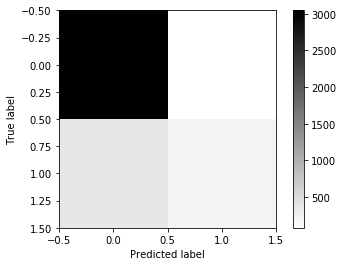

In [70]:
# Calcul de la matrice de confusion
cm_logr = metrics.confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm_logr, interpolation='nearest', cmap=plt.cm.binary)
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label',
       xlabel='Predicted label')

plt.show()

## Linear SVM

## Classification SVM

In [71]:
%%time
from sklearn.svm import LinearSVC

# cf https://github.com/scikit-learn/scikit-learn/issues/11536
warnings.filterwarnings("ignore")

# On crée le classifieur linéaire SVM
svm = LinearSVC(max_iter = 1000, class_weight='balanced', dual=False)

# On crée la grille de paramètres à tester
params = {  'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'multi_class' : ["crammer_singer","ovr"],
            'penalty' : ["l1","l2"],
            #'gamma': [0.0001, 0.001, 0.01, 0.1],
            #'kernel':['linear','rbf']
         }

# On définit le type de score qu'on cherche à optimiser
score = 'f1'

# On crée la validation croisée avec GridSearchCV
gs_svm = GridSearchCV(svm, 
                      params, 
                      scoring = score, 
                      cv = skf)

# On lance la validation croisée sur le jeu d'entrainement
gs_svm.fit(X_train_std, y_train)

# On affiche les hyperparamètres optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",gs_svm.best_params_, 
      "avec un score f1 de", round(gs_svm.cv_results_['mean_test_score'].max(), 3))

# Afficher les différentes performances
print("\nRésultats de la validation croisée :")
for mean, std, params in zip(gs_svm.cv_results_['mean_test_score'], # score moyen
    gs_svm.cv_results_['std_test_score'], # écart-type du score
    gs_svm.cv_results_['params'] # valeur de l'hyperparamètre
    ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
    mean, # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))



Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'C': 1, 'multi_class': 'crammer_singer', 'penalty': 'l2'} avec un score f1 de 0.662

Résultats de la validation croisée :
	f1 = 0.611 (+/-0.033) for {'C': 0.001, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
	f1 = 0.611 (+/-0.034) for {'C': 0.001, 'multi_class': 'crammer_singer', 'penalty': 'l2'}
	f1 = 0.639 (+/-0.017) for {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l1'}
	f1 = 0.588 (+/-0.028) for {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2'}
	f1 = 0.655 (+/-0.010) for {'C': 0.01, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
	f1 = 0.655 (+/-0.010) for {'C': 0.01, 'multi_class': 'crammer_singer', 'penalty': 'l2'}
	f1 = 0.622 (+/-0.026) for {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l1'}
	f1 = 0.604 (+/-0.031) for {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2'}
	f1 = 0.661 (+/-0.004) for {'C': 0.1, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
	f1 = 0.661 (+/-0.004) for {'C': 0.1, 'multi_class': 'cramme

In [72]:
y_pred = gs_svm.predict(X_test_std_df)
svm_pred_score = metrics.f1_score(y_test, y_pred)
print("\nSur le jeu de test le score f1 est de %0.3f" % svm_pred_score)


Sur le jeu de test le score f1 est de 0.624


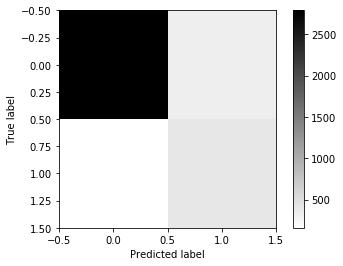

In [73]:
# Calcul de la matrice de confusion
cm_svm = metrics.confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.binary)
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label',
       xlabel='Predicted label')

plt.show()

## Random Forest

In [74]:
%%time
from sklearn.ensemble import RandomForestClassifier

# On crée le classifieur 
rf = RandomForestClassifier(n_estimators=100, random_state=seed)

# On crée la grille de paramètres à tester
params = {'max_depth' : [8, 16, 32, 64],
          'max_features': ['auto', 'sqrt', 'log2'],
          "criterion": ["gini", "entropy"],
          "bootstrap": [True, False]
         }

# On définit le type de score qu'on cherche à optimiser
score = 'f1'

# On crée la validation croisée avec GridSearchCV
gs_rf = GridSearchCV(rf, 
                      params, 
                      scoring = score, 
                      cv = skf)

# On lance la validation croisée sur le jeu d'entrainement
gs_rf.fit(X_train_std, y_train)

# On affiche les hyperparamètres optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",gs_rf.best_params_, 
      "avec un score f1 de", round(gs_rf.cv_results_['mean_test_score'].max(), 3))

# Afficher les différentes performances
print("\nRésultats de la validation croisée :")
for mean, std, params in zip(gs_rf.cv_results_['mean_test_score'], # score moyen
    gs_rf.cv_results_['std_test_score'], # écart-type du score
    gs_rf.cv_results_['params'] # valeur de l'hyperparamètre
    ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
    mean, # score moyen
    std * 2, # barre d'erreur
    params # hyperparamètre
    ))


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto'} avec un score f1 de 0.626

Résultats de la validation croisée :
	f1 = 0.432 (+/-0.059) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
	f1 = 0.432 (+/-0.059) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}
	f1 = 0.165 (+/-0.050) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}
	f1 = 0.612 (+/-0.050) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto'}
	f1 = 0.612 (+/-0.050) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt'}
	f1 = 0.558 (+/-0.039) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2'}
	f1 = 0.618 (+/-0.049) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 32, 'max_features': 'auto'}
	f1 = 0.618 (+/-0.049) for {'boot

In [75]:
y_pred = gs_rf.predict(X_test_std_df)
rf_pred_score = metrics.f1_score(y_test, y_pred)
print("\nSur le jeu de test le score f1 est de %0.3f" % rf_pred_score)


Sur le jeu de test le score f1 est de 0.592


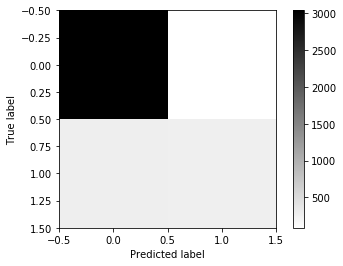

In [76]:
# Calcul de la matrice de confusion
cm_rf = metrics.confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.binary)
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label',
       xlabel='Predicted label')

plt.show()

## Synthèse des modèles

In [79]:
Classifiers = ["kNN", "LogisticRegression", "SVM", "RandomForest"]
F1s = [round(np.mean(knn_pred_score),2),
              round(np.mean(logr_pred_score),2),
                #round(np.mean(lsvm_pred_score),2),
               #round(np.mean(ksvm_pred_score),2),
              round(np.mean(svm_pred_score),2),
              round(np.mean(rf_pred_score),2)]

df1 = pd.DataFrame(list(zip(Classifiers, F1s)), columns = ["Model", "F1"])
df1

,Model,F1
0,kNN,0.28
1,LogisticRegression,0.49
2,SVM,0.62
3,RandomForest,0.59


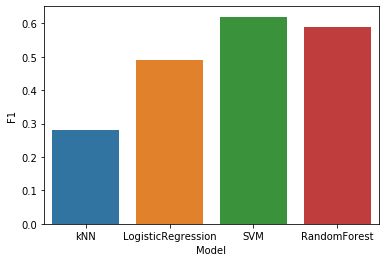

In [80]:
sns.barplot(x="Model", y="F1", data=df1)

LIME ?